#Mileage Prediction - Regression Analysis

<b>Objective:</b>

To predict mileage of a vehicle by implementing Linear Regression and Polynaomial Regression.

<b>Data Source:</b>

This dataset is taken from StatLib library which is maintained at Carmegie Mellon University. The dataset was used in 1983 American Statistical Association Exposition.

<b>Data Set Information:</b>

The dataset is slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quintan(1993) in predicting the attribute 'mpg', 8 of the original instances were removed because they had unknown values for the 'mpg' attribute. The original dataset is available in the file 'auto-mpg-data-original'.
"The data corners city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalues discrete and 5 continuous attributes." (Quintan,1993)

<b>Attribute Information: </b>

1. mpg: continuous
2. cylinders : multi-valued discrete
3. displacement : continuous
4. horsepower : continuous
5. weight : continuous
6. acceleration : continuous
7. model year : multi-valued discrete
8. origin : multi-valued discrete
9. car name : string (unique for each instance)


#Import Library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as py

In [ ]:
import seaborn as sns

#Import Data

In [ ]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

#Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


#Removing Missing Values

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#Data Visualization

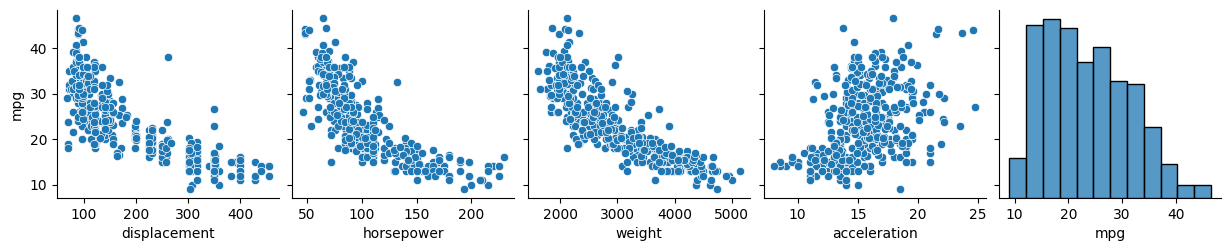

In [ ]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'],y_vars = ['mpg']);

<Axes: xlabel='displacement', ylabel='mpg'>

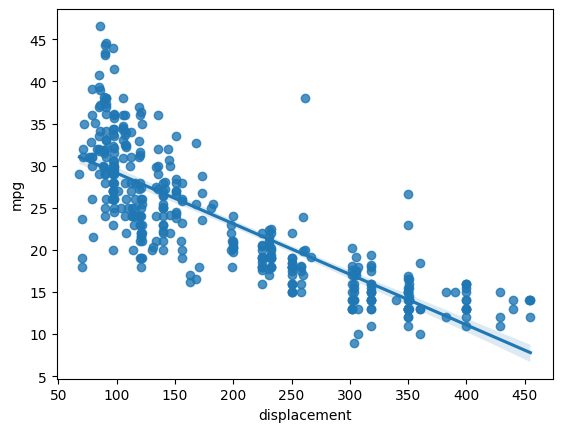

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

#Define Target Variable Y and Feature X

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [ ]:
x.shape

(392, 4)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


#Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
x = ss.fit_transform(x)

In [ ]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


#Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state=2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((294, 4), (98, 4), (294,), (98,))

#Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
m = LinearRegression()

In [ ]:
m.fit(x_train,y_train)

LinearRegression()

In [ ]:
m.intercept_

23.464404729340036

In [ ]:
m.coef_

array([-0.82134735, -2.00007128, -4.12715281, -0.16529152])

#Predict Test Data

In [ ]:
y_pred = m.predict(x_test)

In [ ]:
y_pred

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

3.2128193572784176

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14486145216628085

In [ ]:
mean_squared_error(y_test,y_pred)

16.812242292122622

In [ ]:
r2_score(y_test,y_pred)

0.7174961864188241

#Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pm = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [ ]:
x_train2 = pm.fit_transform(x_train)

In [ ]:
x_test2 = pm.fit_transform(x_test)

In [ ]:
m.fit(x_train2,y_train)

LinearRegression()

In [ ]:
m.intercept_

21.295474126506168

In [ ]:
m.coef_

array([-2.78636354, -5.39053361, -1.15797282, -1.14970885,  1.35645181,
       -0.16432177, -0.03040911,  1.09523004, -0.67580641,  0.78299062])

In [ ]:
y_pred_poly = m.predict(x_test2)

#Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y_test,y_pred_poly)

2.6281657513434173

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.11292169321652239

In [ ]:
r2_score(y_test,y_pred_poly)

0.7705431136534491